In [77]:
import datetime

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
sns.despine()

import matplotlib.pyplot as plt

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
# set_nb_theme('onedrk')

<Figure size 640x480 with 0 Axes>

In [ ]:
<font color='green'>toi yeu ban</font>

<h2 style = "color:black; background:lightgreen"> Reading data </h2>

In [2]:
df = pd.read_csv("udemy_course.csv")
df

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13603,3005408,מושגים בסיסיים באופציות חלק ב,/course/1-ndgzhu/,False,47,0.00000,0.00000,0.00000,0,False,6,0,2020-04-15T10:20:17Z,2020-04-23T02:06:55Z,NaN,NaN,NaN,NaN,NaN,NaN
13604,3467284,Programa de Integridade,/course/iaudit_programa_de_integridade/,False,19,0.00000,0.00000,0.00000,0,False,5,0,2020-09-01T17:57:15Z,2020-09-03T15:26:47Z,NaN,NaN,NaN,NaN,NaN,NaN
13605,3368222,Goodwill and Method of Calculating Goodwill (A...,/course/goodwill-and-method-of-calculating-goo...,False,47,0.00000,0.00000,0.00000,0,False,5,0,2020-07-27T02:29:18Z,2020-07-31T12:14:40Z,NaN,NaN,NaN,NaN,NaN,NaN
13606,3211345,Poderoso Investidor,/course/poderoso-investidor/,False,48,0.00000,0.00000,0.00000,0,False,13,0,2020-06-07T01:29:53Z,2020-07-15T10:35:38Z,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"


<h2 style = "color:black; background:lightgreen"> Data cleaning </h2>

In [4]:
print(df.shape)

(13608, 20)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            13608 non-null  int64  
 1   title                         13608 non-null  object 
 2   url                           13608 non-null  object 
 3   is_paid                       13608 non-null  bool   
 4   num_subscribers               13608 non-null  int64  
 5   avg_rating                    13608 non-null  float64
 6   avg_rating_recent             13608 non-null  float64
 7   rating                        13608 non-null  float64
 8   num_reviews                   13608 non-null  int64  
 9   is_wishlisted                 13608 non-null  bool   
 10  num_published_lectures        13608 non-null  int64  
 11  num_published_practice_tests  13608 non-null  int64  
 12  created                       13608 non-null  object 
 13  p

In [137]:
df.describe().T.sort_values("25%", ascending = False).style.background_gradient(cmap = "Greens")\
    .bar(subset = ["std"], color = "blue").bar(subset = ["75%"], color = "red")

,count,mean,std,min,25%,50%,75%,max
Price,13608.000000,4646.992602,3051.792396,1280.000000,1600.000000,3840.000000,8640.000000,12800.000000
Discount price,13608.000000,493.943794,253.644054,455.000000,455.000000,455.000000,455.000000,3200.000000
Subscribers,13608.000000,2847.010435,9437.865634,0.000000,62.000000,533.000000,2279.500000,374836.000000
Lectures,13608.000000,32.224794,42.766911,0.000000,12.000000,21.000000,37.000000,699.000000
Num reviews,13608.000000,243.169827,1580.965895,0.000000,7.000000,24.000000,87.000000,78006.000000
Average rating,13608.000000,3.923293,1.031304,0.000000,3.800000,4.194440,4.450000,5.000000
Rating,13608.000000,3.912242,1.039237,0.000000,3.787315,4.181735,4.452105,5.000000


In [7]:
    for column in df.columns:
        print(f"{column} ---> {df[column].nunique()}")

id ---> 13608
title ---> 13563
url ---> 13608
is_paid ---> 2
num_subscribers ---> 4875
avg_rating ---> 1965
avg_rating_recent ---> 11781
rating ---> 11781
num_reviews ---> 1285
is_wishlisted ---> 1
num_published_lectures ---> 301
num_published_practice_tests ---> 7
created ---> 13607
published_time ---> 13605
discount_price__amount ---> 53
discount_price__currency ---> 1
discount_price__price_string ---> 53
price_detail__amount ---> 37
price_detail__currency ---> 1
price_detail__price_string ---> 37


### <font color='blue'> Drop unnecessary column and change name </font>

In [8]:
df.drop(["id", "url", 
         "is_paid", "is_wishlisted", "num_published_practice_tests",
        "created", "discount_price__currency", 
        "avg_rating_recent","discount_price__price_string","price_detail__price_string"], axis = 1, inplace = True)
df.rename({"avg_rating": "Average rating", "title":"Title",
           "rating":"Rating", "num_subscribers":"Subscribers", "published_time":"Time",
          "num_reviews": "Num reviews",
          "num_published_lectures":"Lectures",
          "discount_price__amount":"Discount price",
          "price_detail__amount":"Price", 
          "price_detail__currency": "Price detail"}, axis = 1, inplace = True)

### <font color='blue'> Check NaN </font>

In [9]:
for column in df.columns:
    print(f"{column}")
    print(f"{df[column].isnull().value_counts()}\n")    

Title
False    13608
Name: Title, dtype: int64

Subscribers
False    13608
Name: Subscribers, dtype: int64

Average rating
False    13608
Name: Average rating, dtype: int64

Rating
False    13608
Name: Rating, dtype: int64

Num reviews
False    13608
Name: Num reviews, dtype: int64

Lectures
False    13608
Name: Lectures, dtype: int64

Time
False    13608
Name: Time, dtype: int64

Discount price
False    12205
True      1403
Name: Discount price, dtype: int64

Price
False    13111
True       497
Name: Price, dtype: int64

Price detail
False    13111
True       497
Name: Price detail, dtype: int64



In [11]:
df.loc[df["Price"].isna()].head().sort_values("Price detail", ascending = False)\
    .style.background_gradient().bar(subset = ["Discount price"], color = "blue")

,Title,Subscribers,Average rating,Rating,Num reviews,Lectures,Time,Discount price,Price,Price detail
11484,Stock Market Investing for Beginners,259888,4.349280,4.359020,23635,15,2013-12-25T19:53:34Z,nan,nan,nan
11485,Introduction to Financial Modeling,105131,4.201090,4.231700,7378,8,2014-05-27T16:22:16Z,nan,nan,nan
11486,Introduction to Corporate Finance (Mergers & Acquisitions),43396,4.425090,4.439530,4461,30,2017-02-28T16:14:06Z,nan,nan,nan
11487,Learn and Master the Basics of Finance,43106,4.306820,4.338870,3590,39,2016-09-25T20:37:51Z,nan,nan,nan
11488,Stock Market Foundations,56172,4.159250,4.206900,3083,9,2014-03-31T21:35:06Z,nan,nan,nan


In [12]:
df["Price detail"].fillna("unknown", inplace = True)
for column in df.columns[7:9]:
    df[column].replace(np.nan, df[column].mean(), inplace = True)

<h2 style = "color:black; background:lightgreen"> Data formatting </h2>

In [13]:
df.dtypes

Title              object
Subscribers         int64
Average rating    float64
Rating            float64
Num reviews         int64
Lectures            int64
Time               object
Discount price    float64
Price             float64
Price detail       object
dtype: object

In [14]:
df.duplicated().sum()

0

In [15]:
df.drop_duplicates(inplace = True)

In [16]:
df["Time"] = pd.to_datetime(df["Time"])

<h2 style = "color:black; background:lightgreen"> Data visualization </h2>

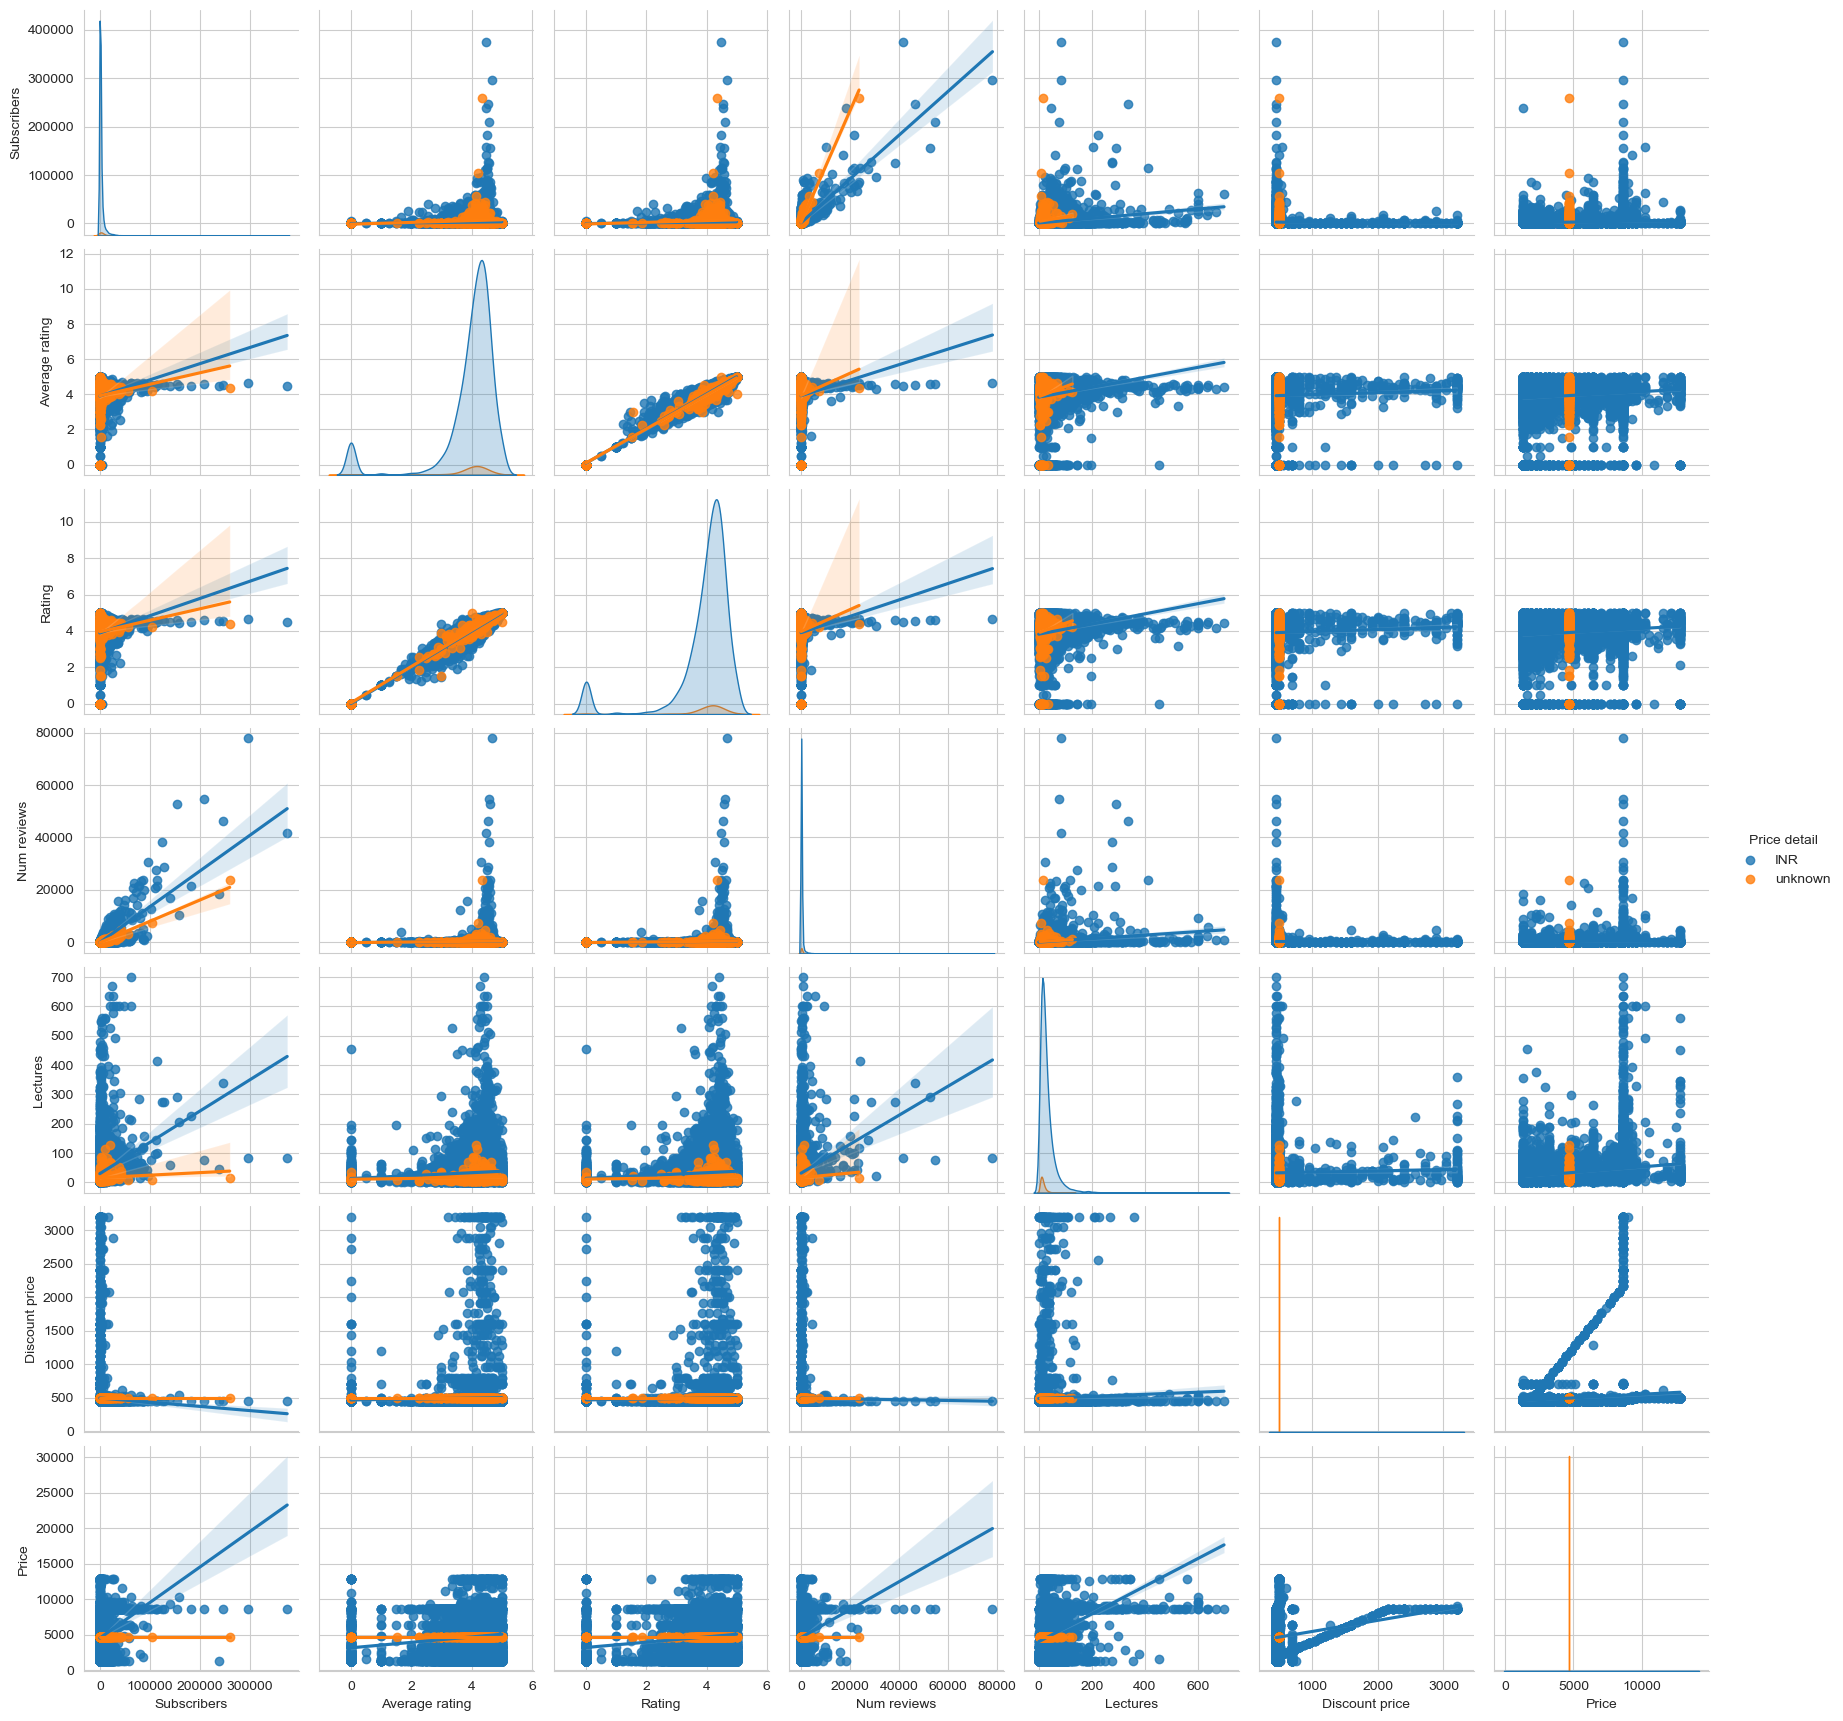

In [17]:
sns.pairplot(data = df, kind = "reg", hue = "Price detail")

### <font color='blue'> Calculation </font>

In [38]:
def calculate():
    # The highest price course and the lowest price course
    df_price_course = df.set_index("Title")
    highest_price_course = df_price_course["Price"].idxmax()
    max_highest_price_course = df_price_course["Price"].max()
    lowest_price_course = df_price_course["Price"].idxmin()
    min_lowest_price_course = df_price_course["Price"].min()
    
    # The oldest course and the newest course
    df_time = df.set_index("Title")
    oldest_course = df_time["Time"].idxmin()
    min_oldest_course = df_time["Time"].min()
    newest_course = df_time["Time"].idxmax()
    max_newest_course = df_time["Time"].max()
    
    # The highest reviews and the lowest reviews
    df_reviews = df.set_index("Title")
    highest_reviews = df_reviews["Num reviews"].idxmax()
    max_highest_reviews = df_reviews["Num reviews"].max()
    lowest_reviews = df_reviews["Num reviews"].idxmin()
    min_lowest_reviews = df_reviews["Num reviews"].min()
    
    # The highest lectures and the lowest lectures
    df_lectures = df.set_index("Title")
    highest_lectures = df_lectures["Lectures"].idxmax()
    max_highest_lectures = df_lectures["Lectures"].max()
    lowest_lectures = df_lectures["Lectures"].idxmin()
    min_lowest_lectures = df_lectures["Lectures"].min()
    
    return {
        print(f"Highest price course is: {highest_price_course} -----> {max_highest_price_course}\n"),
        print(f"Lowest price course is: {lowest_price_course} ----->  {min_lowest_price_course}\n"),
        print(f"Oldest course is: {oldest_course} -----> {min_oldest_course}\n"),
        print(f"Newest course is: {newest_course} -----> {max_newest_course}\n"),
        print(f"Highest reviews is: {highest_reviews} -----> {max_highest_reviews}\n"),
        print(f"Lowest reviews is: {lowest_reviews} -----> {min_lowest_reviews}\n"),
        print(f"Highest lectures is: {highest_lectures} -----> {max_highest_lectures}\n"),
        print(f"Lowest lectures is: {lowest_lectures} -----> {min_lowest_lectures}\n")
           }
print(calculate())

Highest price course is: Project Management Professional (PMP)® - 35 Contact Hours -----> 12800.0

Lowest price course is: Deep Learning Prerequisites: The Numpy Stack in Python (V2+) ----->  1280.0

Oldest course is: Simple Strategy for Swing Trading the Stock Market -----> 2010-04-14 16:32:46+00:00

Newest course is: CBBF (BTA - CERTIFIED BLOCKCHAIN BUSINESS FOUNDATION) EXAM -----> 2020-09-10 06:31:11+00:00

Highest reviews is: The Complete SQL Bootcamp 2020: Go from Zero to Hero -----> 78006

Lowest reviews is: The Complete Financial Analytics and Investing Course -----> 0

Highest lectures is: Accounting–Financial Accounting Total-Beginners to Advanced -----> 699

Lowest lectures is: PMP PMBOK 6 Practice Exams: Set One for PMP Candidates -----> 0

{None}


### <font color='blue'>Top 15 courses with the most lecturess </font>

In [122]:
fig = px.bar(df, x = df.sort_values(by="Lectures", ascending=False)["Lectures"][0:15], 
             y = df.sort_values(by="Lectures", ascending=False).Title[0:15], 
             width = 950, height = 480, text_auto = True,
            barmode = "group", color = df.sort_values(by="Lectures", ascending=False)["Lectures"][0:15])

fig.update_traces(textfont_size=14, textangle=0, textposition="outside", cliponaxis=False)

fig.update_layout(title = "TOP 15 COURSES WITH THE MOST LECTURES", title_x = 0.5, title_y = 1, 
                  hovermode = "x",
                 xaxis = dict(title = "Lectures's number", titlefont = dict(size = 16)), 
                 yaxis = dict(title = "Course's name", titlefont = dict(size = 16)))
fig.update_layout(paper_bgcolor = "rgb(220, 220, 220)", 
                 plot_bgcolor = "rgb(220, 220, 220)")

fig.show()

### <font color='blue'>Top 15 courses with the most Num reviews </font>

In [95]:
fig = px.bar(df, x = df.sort_values(by="Num reviews", ascending=False)["Num reviews"][0:15], 
             y = df.sort_values(by="Num reviews", ascending=False).Title[0:15], 
             width = 950, height = 480, text_auto = True,
            barmode = "group", color = df.sort_values(by="Num reviews", ascending=False)["Num reviews"][0:15], template="plotly_dark")

fig.update_traces(textfont_size=14, textangle=0, textposition="outside", cliponaxis=False)

fig.update_layout(title = "TOP 15 COURSES WITH THE MOST LECTURES", title_x = 0.5, title_y = 1, 
                  hovermode = "x",
                 xaxis = dict(title = "Lectures's number", titlefont = dict(size = 16)), 
                 yaxis = dict(title = "Course's name", titlefont = dict(size = 16)))
fig.show()

### <font color='blue'>Top 15 courses with the most Subscribers </font>

In [98]:
fig = px.bar_polar(df, r = df.sort_values(by="Subscribers", ascending=False)["Subscribers"][0:15],
                  theta = df.sort_values(by="Subscribers", ascending=False).Title[0:15], 
                  color = df.sort_values(by="Subscribers", ascending=False)["Subscribers"][0:15], 
                  template="plotly_dark")
fig.show()

In [136]:
fig = make_subplots(rows = 1, cols = 2, specs=[[{'type': 'polar'}]*2]*1)

fig.add_trace(go.Barpolar(r = df.sort_values(by="Lectures", ascending=False)["Lectures"][0:15], 
                         theta = df.sort_values(by="Lectures", ascending=False).Title[0:15], 
                         name = "Lectures"), 1, 1)

fig.add_trace(go.Barpolar(r = df.sort_values(by="Num reviews", ascending=False)["Num reviews"][0:15], 
                             theta = df.sort_values(by="Num reviews", ascending=False).Title[0:15], 
                         name = "Num reviews"), 1, 2)
fig.update_layout(legend = dict(orientation = "h", xanchor = "center", yanchor = "top", 
                               x = 0.5, y = 1.3, font_size = 18, 
                               bgcolor = "Lightblue", bordercolor = "Black", borderwidth = 1.5))

fig.show()